In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

In [3]:
my_dpi = 200
font_path = "../data_visualization/NotoSansKR-Regular.ttf"
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = "Noto Sans KR"
my_theme = "dark"

sb.set_theme(style=my_theme)
plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [4]:
origin = load_data("countries_aggregated")
origin.head()

[data] https://data.hossam.kr/data/lab09_/countries_aggregated.xlsx
[desc] 전 세계 각국(country) 단위로 매일 집계된 COVID-19 감염 상황 (출처: Johns Hopkins University Center for Systems Science and Engineering)

field      description
---------  ----------------------------------------
Date       날짜
Country    국가명
Confirmed  해당 날짜를 기준으로 하는 누적 확진자 수
Recovered  해당 날짜를 기준으로 하는 누적 완치자 수
Deaths     해당 날짜를 기준으로 하는 누적 사망자 수



,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [5]:
origin.tail()

,Date,Country,Confirmed,Recovered,Deaths
161563,2022-04-12,Zimbabwe,247094,0,5460
161564,2022-04-13,Zimbabwe,247160,0,5460
161565,2022-04-14,Zimbabwe,247208,0,5462
161566,2022-04-15,Zimbabwe,247237,0,5462
161567,2022-04-16,Zimbabwe,247237,0,5462


In [6]:
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

데이터셋 크기: (161568, 5)
열 개수: 5
행 개수: 161568


In [7]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB


In [8]:
df = origin.astype({'Country':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  category      
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(3)
memory usage: 5.2 MB


In [9]:
df.isna().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [12]:
df[['Confirmed','Recovered','Deaths']].describe().T

,count,mean,std,min,25%,50%,75%,max
Confirmed,161568.0,736156.934009,3.578884e+06,0.0,1220.0,23692.0,255842.00,80625120.0
Recovered,161568.0,145396.711892,9.748275e+05,0.0,0.0,126.0,17972.25,30974748.0
Deaths,161568.0,13999.436089,5.911358e+04,0.0,17.0,365.0,4509.00,988609.0


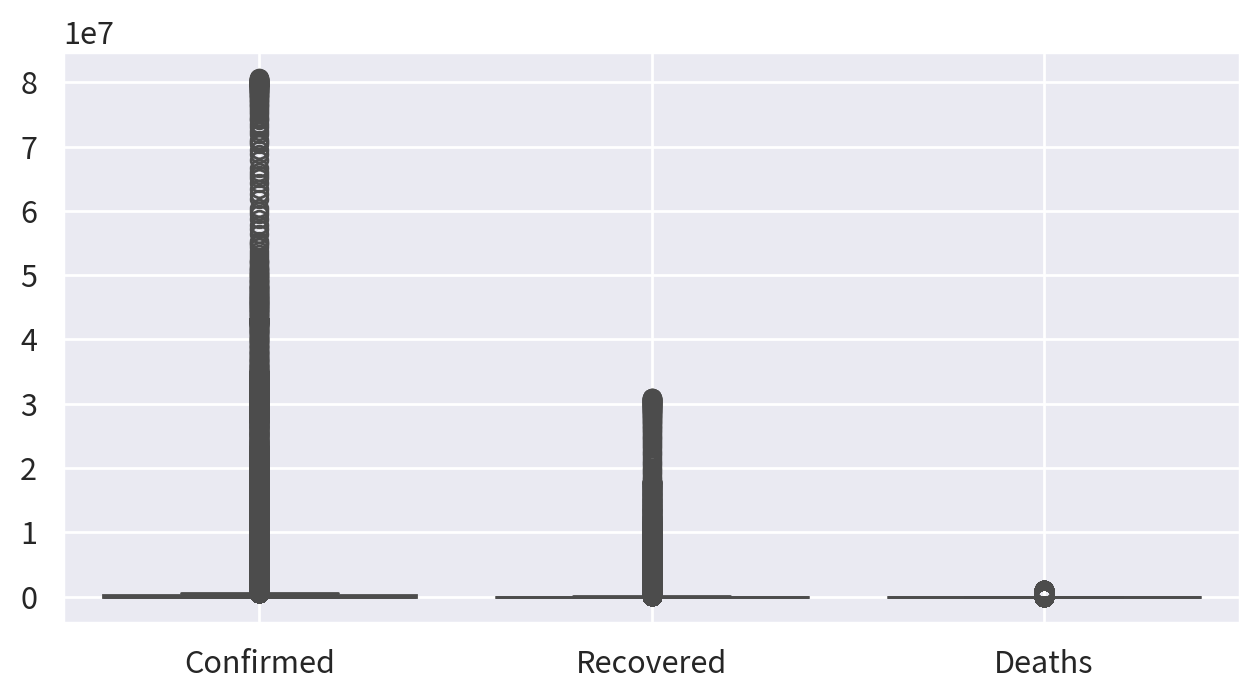

In [13]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.boxplot(data=df, orient='v')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

> - 모든 변수에서 다수의 이상값이 존재함
> - 모든 데이터가 우편향이 심하기 때문에 이상치가 많음을 의미함
> - 이 상태로는 데이터의 분포를 확인하기 어려움 -> 스케일링 필요
- 격차가 크면 스케일링을 하는데 log 값 취하는 것도 일종의 방법

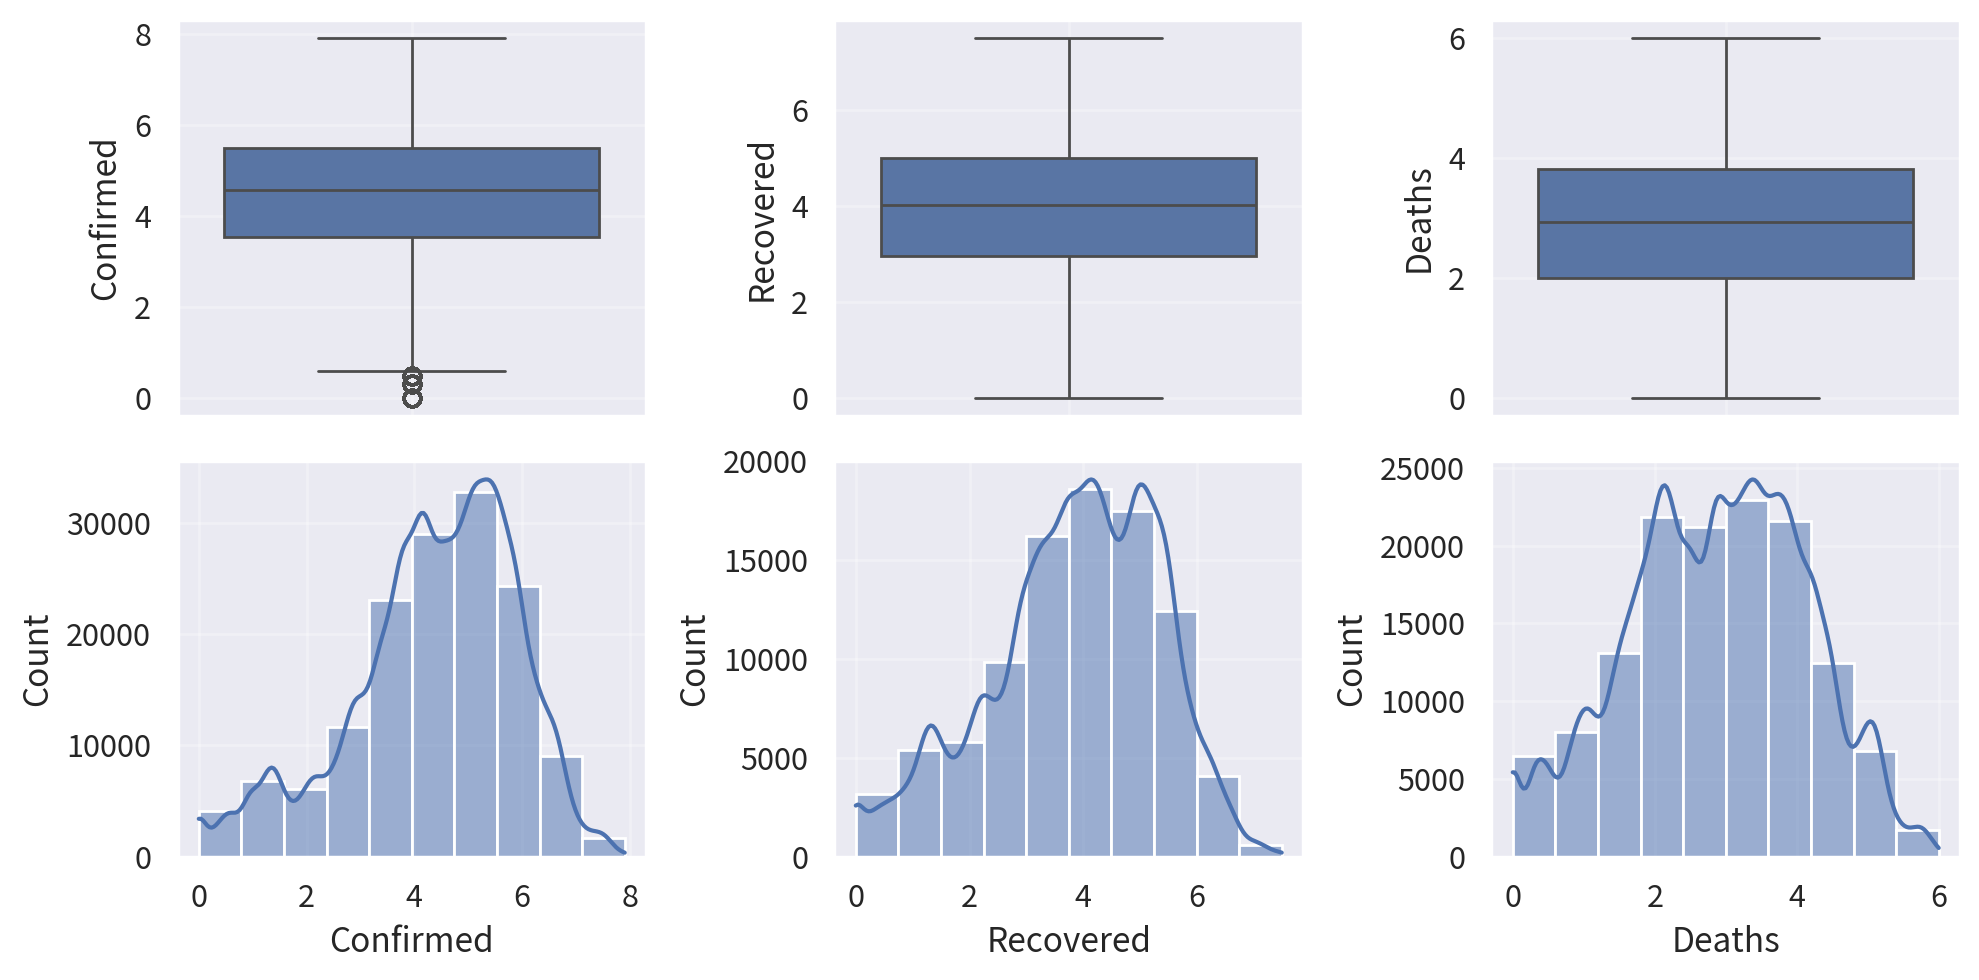

In [15]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2000             #그래프 가로 크기
height_px = 1000             #그래프 세로 크기
rows = 2                    #도화지의 행 수
cols = 3                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

for i, col in enumerate(['Confirmed','Recovered','Deaths']):
    data = df[df[col] > 0][col]
    log_data = np.log10(data)

    sb.boxplot(log_data, orient='v', ax=ax[0][i])
    ax[0][i].grid(True, alpha=0.3)

    sb.histplot(log_data, bins=10, kde=True, ax=ax[1][i])
    ax[1][i].grid(True, alpha=0.3)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

- 시각화 결과를 통해 Confirmed, Recovered에서 명확한 우편향 분포 확인
- 로그변환 후에도 여전히 치우친 분포 = 정규 분포와 거리가 멈

In [16]:
df.describe(include='category')

,Country
count,161568
unique,198
top,Afghanistan
freq,816


### 연습문제 - 부동산 시장 분석 프로젝트

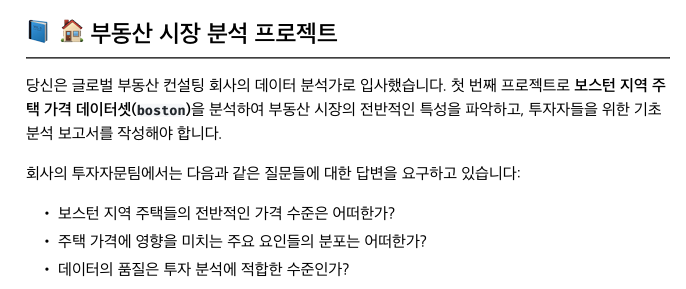

In [22]:
origin = load_data("boston")
origin.head()

[data] https://data.hossam.kr/data/kaggle/boston.xlsx
[desc] 보스턴 인근 지역의 인구·환경·교육·범죄·세금 정보 등을 기반으로 주택의 중위가격(MEDV)을 예측하기 위해 수집된 대표적인 회귀 분석용 주택시장 데이터 (출처: https://www.kaggle.com/datasets/altavish/boston-housing-dataset)

field    description
-------  ---------------------------------------------------------------------------------------
CRIM     타운별 1인당 범죄율 (Per capita crime rate by town)
ZN       25,000 sqft 이상 주거용 대지 비율 (Proportion of residential land zoned for large lots)
INDUS    비소매 상업구역 비율 (Proportion of non-retail business acres per town)
CHAS     찰스강 인접 여부 (Charles River dummy variable: 1 if tract bounds river; 0 otherwise)
NOX      대기 오염 정도 (Nitric oxides concentration, parts per 10 million)
RM       주택당 평균 방(Room) 수 (Average number of rooms per dwelling)
AGE      1940년 이전 건축 비율 (Proportion of owner-occupied units built prior to 1940)
DIS      5개 주요 고용센터까지의 거리 (Weighted distances to five Boston employment centers)
RAD      고속도로 접근성 지수 (Index of accessibility to radial highways)
T

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
print(f"데이터셋 크기: {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")
origin.info()

데이터셋 크기: (506, 14)
열 개수: 14
행 개수: 506
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [23]:
df = origin.astype({'CHAS':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    int64   
 9   TAX      506 non-null    int64   
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(1), float64(11), int64(2)
memory usage: 52.1 KB


In [24]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [26]:
fields = ['MEDV','CRIM','RM','LSTAT','NOX']
df[fields].describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
LSTAT,506.0,12.653063,7.141062,1.73000,6.950000,11.36000,16.955000,37.9700
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710


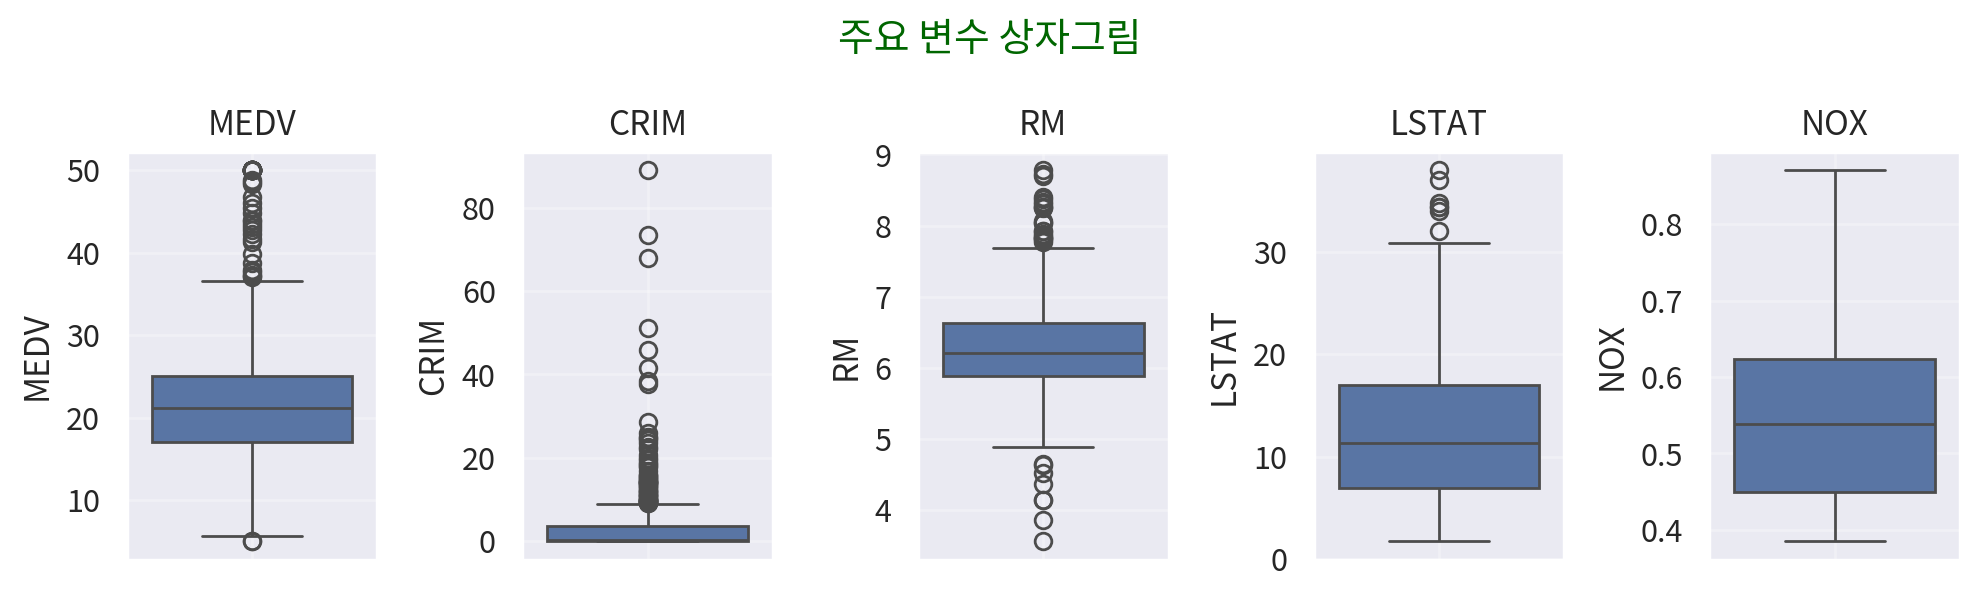

In [28]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2000             #그래프 가로 크기
height_px = 600             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 5                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

result = []

for i, v in enumerate(fields):
    sb.boxplot(data=df, y=v, ax=ax[i])
    ax[i].set_title(v)
    ax[i].grid(alpha=0.3)

# 3) 그래프 꾸미기
fig.suptitle('주요 변수 상자그림', fontsize=14, color='#006600')
fig.subplots_adjust(wspace=0.2, hspace=0.2)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

> 이상값이 관측되는 변수가 존재한다.
>
> 이상치에 대한 처리는 분석가의 주관이 반영될 수 있기 때문에 이상치를 처리할 것인지, 그대로 둘 것인지는 분석가의 판단에 따른다.
>
> 만약, 이상치를 그대로 둔다면 이상치에 민감한 분석 기법들이 많기 때문에 스케일링, 로그 변환 등으로 이상치에 대한 민감성을 축소시켜야 한다.

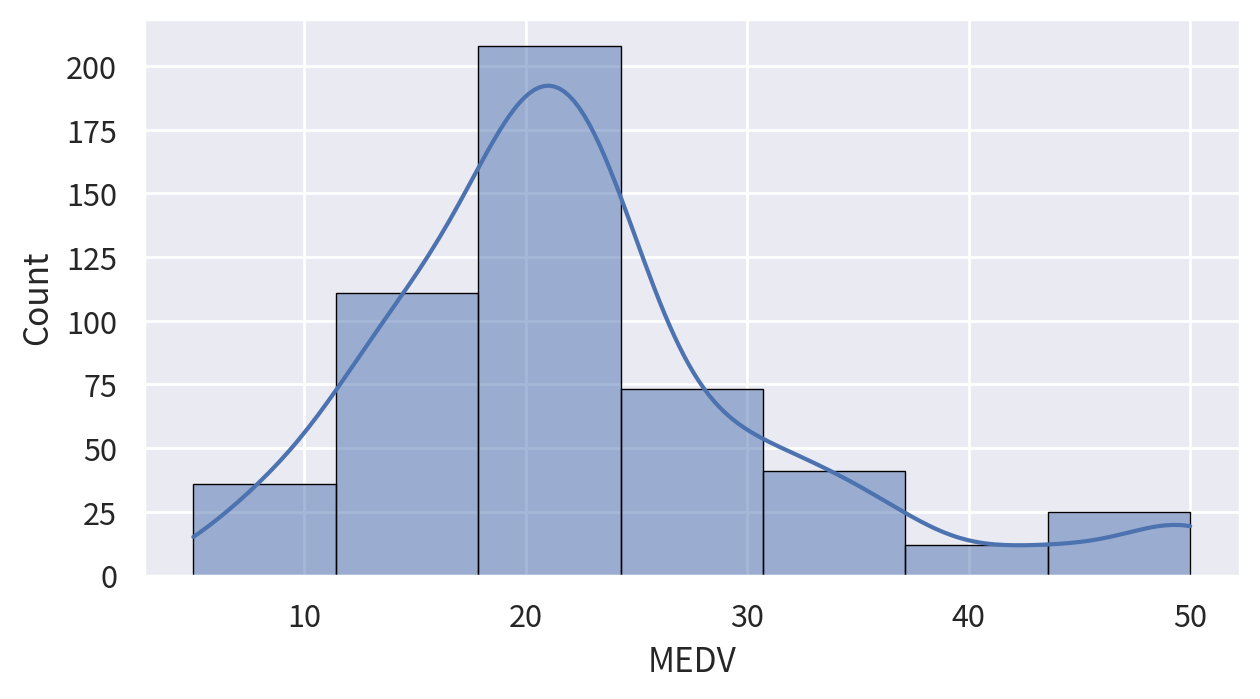

In [29]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.histplot(data=df, x="MEDV",bins=7, kde = True, edgecolor='black', linewidth=0.5)

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

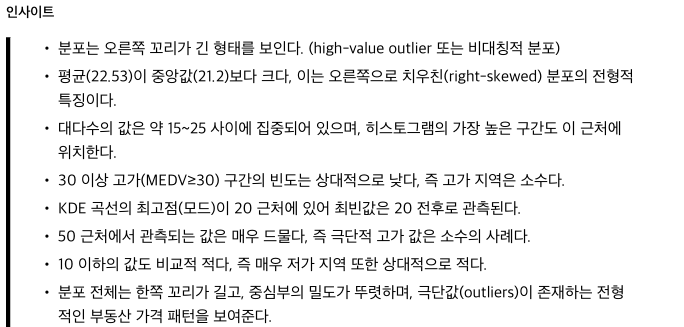

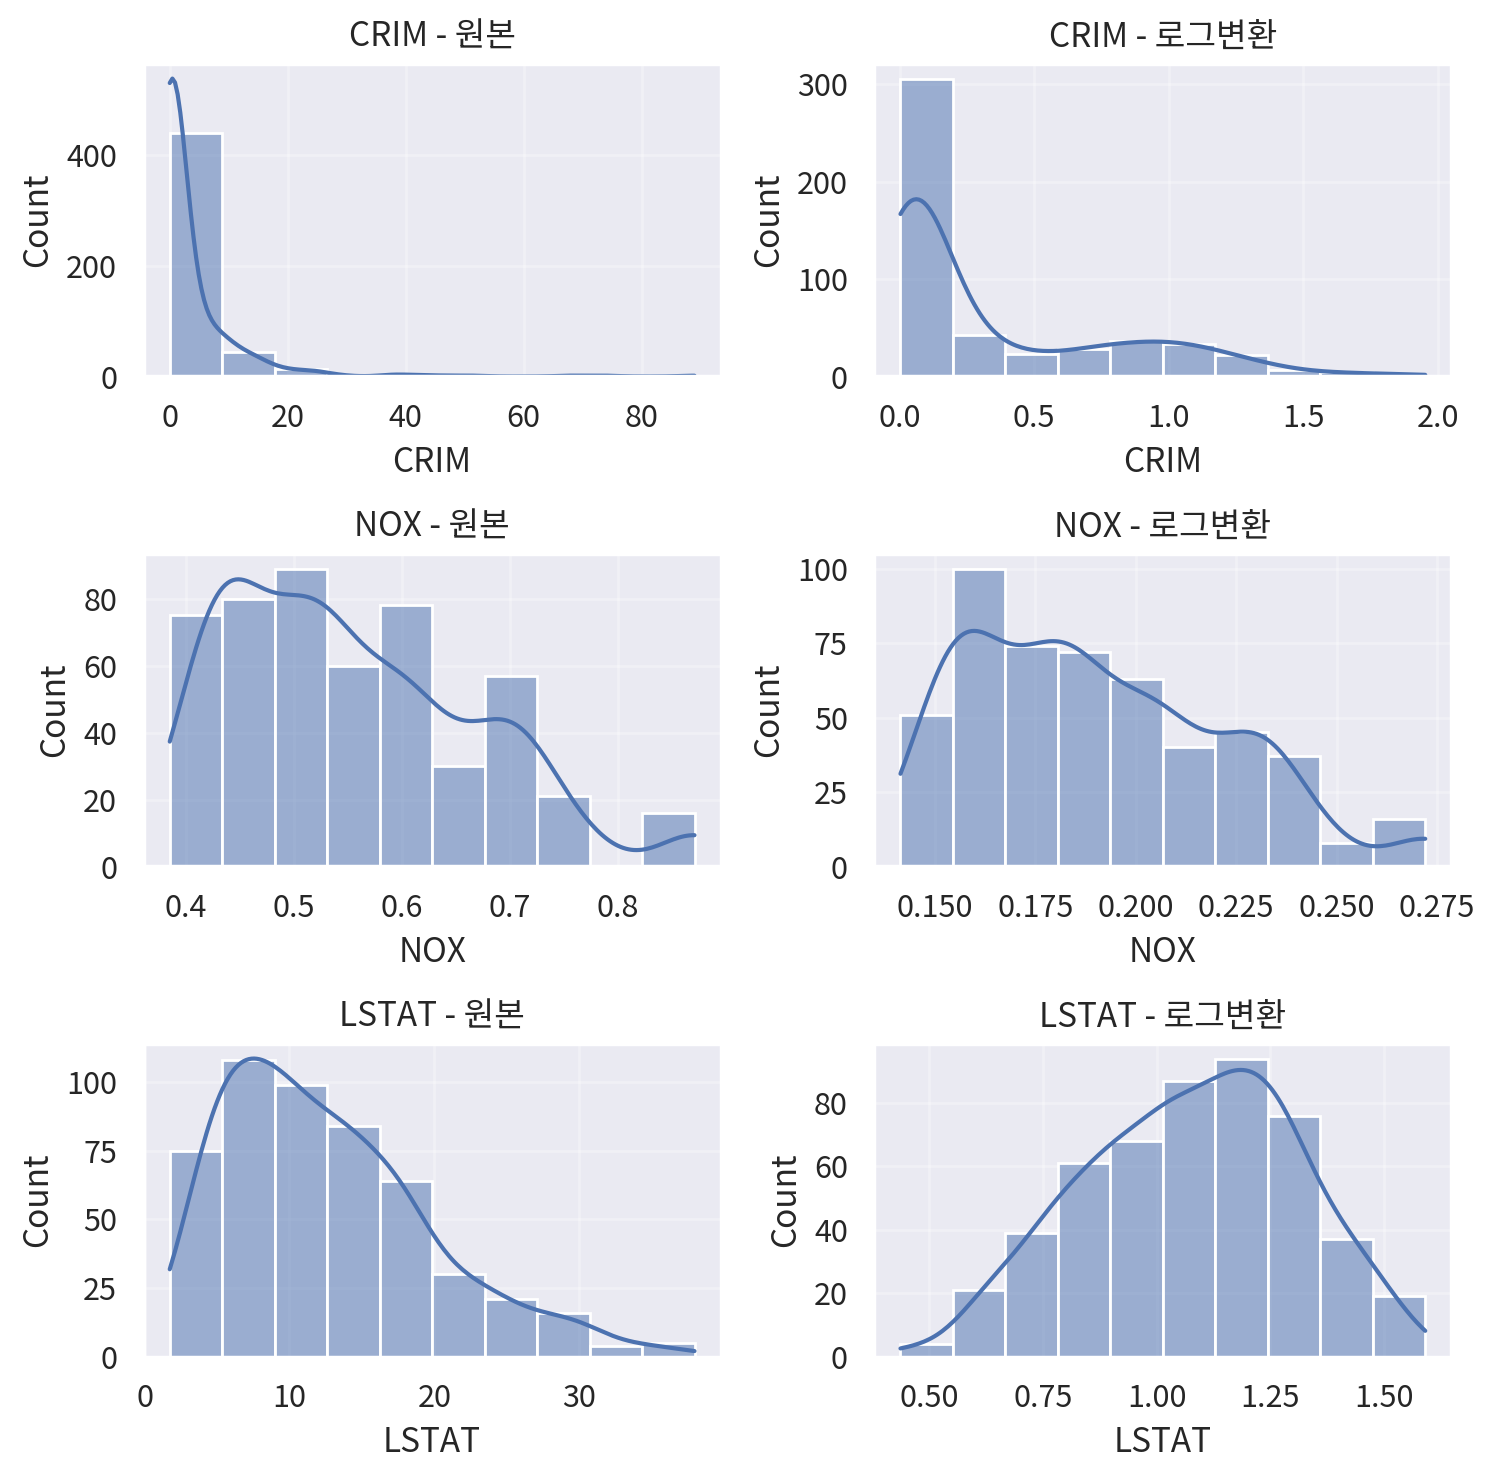

In [30]:
skewed_vars = ['CRIM','NOX','LSTAT']

# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1500             #그래프 가로 크기
height_px = 1500             #그래프 세로 크기
rows = len(skewed_vars)                    #도화지의 행 수
cols = 2                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
for i, v in enumerate(skewed_vars):
    sb.histplot(data=df, x=v,bins=10, kde = True, ax=ax[i][0])
    ax[i][0].set_title(f'{v} - 원본')
    ax[i][0].grid(alpha=0.3)

    log_data = np.log10(df[v] + 1)
    sb.histplot(data=log_data, bins=10, kde=True, ax=ax[i][1])
    ax[i][1].set_title(f'{v} - 로그변환')
    ax[i][1].grid(alpha=0.3)

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
fig.subplots_adjust(wspace=0.2, hspace=0.2)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

In [31]:
chas_counts = df['CHAS'].value_counts()
chas_counts

CHAS
0    471
1     35
Name: count, dtype: int64

In [32]:
chas_props = df['CHAS'].value_counts(normalize=True)*100
chas_props

CHAS
0    93.083004
1     6.916996
Name: proportion, dtype: float64